In [41]:
# Deskriptive Statistik
# mit Pandas und via_intermediary = 0

import operator
from dateutil import parser
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import re
import json
import pandas as pd
from matplotlib_venn import venn2, venn3

In [43]:
# Synonyme für PFP als Liste
pfp_gen = ['Pflegefachperson', 'Pflegefachfrau', 'Pflegefachmann', 'Pflegefachkraft']
pfp_kh =  ['Krankenschwester', 'Krankenpfleger', 'Krankenpflegefachperson']
pfp_ap = ['Altenpfleger', 'Altenpflegefachkraft', 'Altenpflegefachperson']
pfp_ki = ['Kinderkrankenschwester', 'Kinderkrankenpfleger', 'Kinderkrankenpflegefachperson'] 
# Die Bezeichnungen in pfp_ki entsprechen den Bezeichnungen in pfp_kh mit dem Zusatz "Kinder".
# Falls in pfp_ki eine Bezeichnung steht, die dieser Regel widerspricht, so wird diese nicht gezählt!!
# Außerdem muss pfp_ki[n] auch pfp_kh[n] entsprechen (jeweils mit/ohne Kinder-), sonst funktioniert der Zähler nicht (Z. 142f.)!
# Dieser Regel darf also nicht widersprochen werden!
# Weibliche Formen, die nur durch -in entstehen, werden nicht beachtet bzw. zählen zu den männlichen dazu

In [45]:
# Echte Daten
years = ['2016'] # Hier die Jahre angeben, die geladen werden sollen (final: 2016-2023)
count_gen_oza = {}
count_kh_oza = {}
count_ki_oza = {}
count_ap_oza = {}
count_all_oza = {}
count_kh_gen = {}
count_kh_ki = {}
count_kh_ap = {}
count_gen_ki = {}
count_gen_ap = {}
count_ki_ap = {}
count_kh_gen_ki = {}
count_kh_gen_ap = {}
count_kh_ki_ap = {}
count_gen_ki_ap = {}
count_gen_ki_ap_kh = {}
count_vars_unique = {}
count_einser = {}
count_zweier = {}
count_dreier = {}
total_count = {}
total_nan = {}
fehler = {}
for year in years:
    # Hier Jahr öffnen (json), filtern, Variablen rausholen, löschen
    with open(f"/Users/jan/Documents/Promotion/BIBB GW/hdd/Pflege/Pflege_{year}.json", 'r') as file:
        output = json.load(file)
    sorted_indices = sorted(output["date"], key=lambda i: output["date"][i])
    #df_full = pd.DataFrame(sorted_indices)
    df_full = pd.DataFrame({
        "date": [output["date"][i] for i in sorted_indices],
        "full_text": [output["full_text"][i] for i in sorted_indices],
        "via_intermediary": [output["via_intermediary"][i] for i in sorted_indices],
        "contract_type": [output["contract_type"][i] for i in sorted_indices]
    })
    del sorted_indices
    # Intermediarys rausfiltern
    df_full = df_full[df_full["via_intermediary"] != True]
    df_full['gen'] = pd.NA
    df_full['kh'] = pd.NA
    df_full['ki'] = pd.NA
    df_full['ap'] = pd.NA
    for i in range(len(pfp_gen)):
        result = df_full['full_text'].str.contains(pfp_gen[i], case=False, na=False)
        df_full.loc[result, 'gen'] = 1
    for i in range(len(pfp_kh)):
        result = df_full['full_text'].str.contains(rf'\b{pfp_kh[i]}', case=False, na=False)
        df_full.loc[result, 'kh'] = 1
    for i in range(len(pfp_ki)):
        result = df_full['full_text'].str.contains(pfp_ki[i], case=False, na=False)
        df_full.loc[result, 'ki'] = 1
    for i in range(len(pfp_ap)):
        result = df_full['full_text'].str.contains(pfp_ap[i], case=False, na=False)
        df_full.loc[result, 'ap'] = 1
    fehler[year] = (df_full['ki'].isna() & df_full['gen'].isna() & df_full['kh'].isna() & df_full['ap'].isna()).sum()
    print(f"NaN-Fehler in Jahr {year}: {fehler[year]}")
    count_gen_oza[year] = (df_full['gen'] == 1 & df_full['ap'].isna() & df_full['kh'].isna() & df_full['ki'].isna()).sum()
    count_kh_oza[year] = (df_full['kh'] == 1 & df_full['ap'].isna() & df_full['ki'].isna() & df_full['gen'].isna()).sum()
    count_ki_oza[year] = (df_full['ki'] == 1 & df_full['ap'].isna() & df_full['gen'].isna() & df_full['kh'].isna()).sum()
    count_ap_oza[year] = (df_full['ap'] == 1 & df_full['ki'].isna() & df_full['gen'].isna() & df_full['kh'].isna()).sum()
    count_all_oza[year] = len(df_full)
    print(f"Stellenanzeigen in {year} insgesamt: {count_all_oza[year]}")
    print(f"Stellenanzeigen in {year} nur mit generalistischen Berufsbezeichnungen: {count_gen_oza[year]}")
    print(f"Stellenanzeigen in {year} nur mit Berufsbezeichnungen der Akutpflege: {count_kh_oza[year]}")
    print(f"Stellenanzeigen in {year} nur mit Berufsbezeichnungen der Kinderkrankenpflege: {count_ki_oza[year]}")
    print(f"Stellenanzeigen in {year} nur mit Berufsbezeichnungen der Altenpflege: {count_ap_oza[year]}")
    print("\nJetzt filtern:")
    # Kombination von 'kh' und 'gen'
    count_kh_gen[year] = ((df_full['kh'] == 1) & (df_full['gen'] == 1) & df_full['ki'].isna() & df_full['ap'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit kh = 1 und gen = 1: {count_kh_gen[year]}")
    # Kombination von 'kh' und 'ki'
    count_kh_ki[year] = ((df_full['kh'] == 1) & (df_full['ki'] == 1) & df_full['gen'].isna() & df_full['ap'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit kh = 1 und ki = 1: {count_kh_ki[year]}")
    # Kombination von 'kh' und 'ap'
    count_kh_ap[year] = ((df_full['kh'] == 1) & (df_full['ap'] == 1) & df_full['ki'].isna() & df_full['gen'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit kh = 1 und ap = 1: {count_kh_ap[year]}")
    # Kombination von 'gen' und 'ki'
    count_gen_ki[year] = ((df_full['gen'] == 1) & (df_full['ki'] == 1) & df_full['kh'].isna() & df_full['ap'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit gen = 1 und ki = 1: {count_gen_ki[year]}")
    # Kombination von 'gen' und 'ap'
    count_gen_ap[year] = ((df_full['gen'] == 1) & (df_full['ap'] == 1) & df_full['ki'].isna() & df_full['kh'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit gen = 1 und ap = 1: {count_gen_ap[year]}")
    # Kombination von 'ki' und 'ap'
    count_ki_ap[year] = ((df_full['ki'] == 1) & (df_full['ap'] == 1) & df_full['gen'].isna() & df_full['kh'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit ki = 1 und ap = 1: {count_ki_ap[year]}")
    # Kombination von 'kh', 'gen' und 'ki'
    count_kh_gen_ki[year] = ((df_full['kh'] == 1) & (df_full['ki'] == 1) & (df_full['gen'] == 1) & df_full['ap'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit kh = 1, gen = 1 und ki = 1: {count_kh_gen_ki[year]}")
    # Kombination von 'kh', 'gen' und 'ap'
    count_kh_gen_ap[year] = ((df_full['kh'] == 1) & (df_full['gen'] == 1) & (df_full['ap'] == 1) & df_full['ki'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit kh = 1, gen = 1 und ap = 1: {count_kh_gen_ap[year]}")
    # Kombination von 'kh', 'ki' und 'ap'
    count_kh_ki_ap[year] = ((df_full['kh'] == 1) & (df_full['ki'] == 1) & (df_full['ap'] == 1) & df_full['gen'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit kh = 1, ki = 1 und ap = 1: {count_kh_ki_ap[year]}")
    # Kombination von 'gen', 'ki' und 'ap'
    count_gen_ki_ap[year] = ((df_full['gen'] == 1) & (df_full['ki'] == 1) & (df_full['ap'] == 1) & df_full['kh'].isna()).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit gen = 1, ki = 1 und ap = 1: {count_gen_ki_ap[year]}")
    # Kombination von 'gen', 'ki' und 'ap' und 'kh'
    count_gen_ki_ap_kh[year] = ((df_full['gen'] == 1) & (df_full['ki'] == 1) & (df_full['ap'] == 1) & (df_full['kh'] == 1)).sum()
    print(f"Anzahl der Einträge in Jahr {year} mit gen = 1, ki = 1, ap = 1 und kh = 1: {count_gen_ki_ap_kh[year]}")
    print("Check:")
    count_vars_unique[year] = [
        count_kh_gen[year],     # 'kh=1', 'gen=1'
        count_kh_ki[year],      # 'kh=1', 'ki=1'
        count_kh_ap[year],      # 'kh=1', 'ap=1'

        count_gen_ki[year],     # 'gen=1', 'ki=1'
        count_gen_ap[year],     # 'gen=1', 'ap=1'

        count_ki_ap[year]      # 'ki=1', 'ap=1'
    ]
    count_zweier[year] = sum(count_vars_unique[year])
    count_einser[year] = count_kh_oza[year]+ count_gen_oza[year]+count_ki_oza[year]+count_ap_oza[year]
    count_dreier[year] = count_kh_gen_ki[year]+count_kh_gen_ap[year]+count_kh_ki_ap[year]+count_gen_ki_ap[year]
    # Zeige die Gesamtsumme an
    print(f"Die Gesamtsumme aller 1er in Jahr {year}: {count_einser[year]}")
    print(f"Die Gesamtsumme aller 2er-kombis in Jahr {year}: {count_zweier[year]}")
    print(f"Die Gesamtsumme aller 3er-kombis in Jahr {year}: {count_dreier[year]}")
    print(f"Die Gesamtsumme der 4er-Kombi in Jahr {year}: {count_gen_ki_ap_kh[year]}")
    total_count[year] = count_einser[year]+count_zweier[year]+count_dreier[year]+count_gen_ki_ap_kh[year]
    total_nan[year] = total_count[year]+fehler[year]
    # Zeige die Summe an
    print(f"Die Gesamtsumme aller 1er, 2er, 3er-kombis + der 4er-kombi in Jahr {year} ist: {total_count[year]}")
    print(f"Die Gesamtsumme aller 1er, 2er, 3er-kombis + der 4er-kombi + NaN-Fehler in Jahr {year} ist: {total_nan[year]}")
    print(f"Stellenanzeigen insgesamt: {count_all_oza[year]} (Muss gleich sein wie zeile darüber!)")
    del df_full

NaN-Fehler in Jahr 2016: 263
Stellenanzeigen in 2016 insgesamt: 46628
Stellenanzeigen in 2016 nur mit generalistischen Berufsbezeichnungen: 1439
Stellenanzeigen in 2016 nur mit Berufsbezeichnungen der Akutpflege: 12879
Stellenanzeigen in 2016 nur mit Berufsbezeichnungen der Kinderkrankenpflege: 1470
Stellenanzeigen in 2016 nur mit Berufsbezeichnungen der Altenpflege: 7046

Jetzt filtern:
Anzahl der Einträge in Jahr 2016 mit kh = 1 und gen = 1: 1256
Anzahl der Einträge in Jahr 2016 mit kh = 1 und ki = 1: 1845
Anzahl der Einträge in Jahr 2016 mit kh = 1 und ap = 1: 10050
Anzahl der Einträge in Jahr 2016 mit gen = 1 und ki = 1: 27
Anzahl der Einträge in Jahr 2016 mit gen = 1 und ap = 1: 1032
Anzahl der Einträge in Jahr 2016 mit ki = 1 und ap = 1: 87
Anzahl der Einträge in Jahr 2016 mit kh = 1, gen = 1 und ki = 1: 246
Anzahl der Einträge in Jahr 2016 mit kh = 1, gen = 1 und ap = 1: 4642
Anzahl der Einträge in Jahr 2016 mit kh = 1, ki = 1 und ap = 1: 2615
Anzahl der Einträge in Jahr 2016 mi

In [47]:
for year in years:
    # Erstelle eine Kreuztabelle mit den Variablen als Zeilen und Spalten
    crosstab_matrix = pd.DataFrame(index=['kh=1', 'gen=1', 'ki=1', 'ap=1'],
                                   columns=['kh=1', 'gen=1', 'ki=1', 'ap=1'], dtype=int)
    # Füge die Häufigkeiten basierend auf den Kombinationen hinzu
    crosstab_matrix.loc['kh=1', 'gen=1'] = count_kh_gen[year]
    crosstab_matrix.loc['kh=1', 'ki=1'] = count_kh_ki[year]
    crosstab_matrix.loc['kh=1', 'ap=1'] = count_kh_ap[year]
    crosstab_matrix.loc['kh=1', 'kh=1'] = count_kh_oza[year]

    crosstab_matrix.loc['gen=1', 'ki=1'] = count_gen_ki[year]
    crosstab_matrix.loc['gen=1', 'ap=1'] = count_gen_ap[year]
    crosstab_matrix.loc['gen=1', 'kh=1'] = count_kh_gen[year]
    crosstab_matrix.loc['gen=1', 'gen=1'] = count_gen_oza[year]

    crosstab_matrix.loc['ki=1', 'ap=1'] = count_ki_ap[year]
    crosstab_matrix.loc['ki=1', 'kh=1'] = count_kh_ki[year]
    crosstab_matrix.loc['ki=1', 'ki=1'] = count_ki_oza[year]
    crosstab_matrix.loc['ki=1', 'gen=1'] = count_gen_ki[year]

    crosstab_matrix.loc['ap=1', 'gen=1'] = count_gen_ap[year] 
    crosstab_matrix.loc['ap=1', 'ki=1'] = count_ki_ap[year]
    crosstab_matrix.loc['ap=1', 'ap=1'] = count_ap_oza[year]
    crosstab_matrix.loc['ap=1', 'kh=1'] = count_kh_ap[year]

    crosstab_matrix['Row Total'] = crosstab_matrix.sum(axis=1)
    crosstab_matrix.loc['Column Total'] = crosstab_matrix.sum(axis=0)
    # Zeige die Kreuztabelle an
    print(f"Kreuztabelle: Überschneidungen der Berufsbezeichnungen im Jahr {year}")
    print(crosstab_matrix)
    print("")

Kreuztabelle: Überschneidungen der Berufsbezeichnungen im Jahr 2016
                 kh=1   gen=1    ki=1     ap=1  Row Total
kh=1          12879.0  1256.0  1845.0  10050.0    26030.0
gen=1          1256.0  1439.0    27.0   1032.0     3754.0
ki=1           1845.0    27.0  1470.0     87.0     3429.0
ap=1          10050.0  1032.0    87.0   7046.0    18215.0
Column Total  26030.0  3754.0  3429.0  18215.0    51428.0



In [49]:
# Für alle Jahre + für pre-2020 + für post-2020 + einmal nur für 2023 (ab da gibts Generalisten)
# Zuerst Abfragen, welche Jahre in years-Liste sind!
count_kh_sub = 0
count_ap_sub = 0
count_kh_ki_sub = 0
count_ki_sub = 0
count_kh_ki_sub = 0
count_ki_ap_sub = 0
count_kh_ki_ap_sub = 0
count_kh_ap_sub = 0
count_kh_post = 0
count_ap_post = 0
count_kh_post_sub = 0
count_ki_post = 0
count_kh_ki_post = 0
count_ki_ap_post = 0
count_kh_ki_ap_post = 0
count_kh_ap_post = 0
count_gen_sub = 0
count_kh_gen_sub = 0
count_kh_ap_sub = 0
for year in years:
    fig, ax = plt.subplots(figsize=(8, 6))  # Erstelle ein einzelnes Subplot
    venn3(
        subsets=(
            count_kh[year],  # Nur kh
            count_ap[year],  # Nur gen
            count_kh_ap[year],  # kh & gen
            count_ki[year],  # Nur ki
            count_kh_ki[year],  # kh & ki
            count_ki_ap[year],  # gen & ki
            count_kh_ki_ap[year]  # kh & gen & ki
        ),
        set_labels=('Berufsbezeichnungen aus der Akutpflege', 'Berufsbezeichnungen aus der Altenpflege', 'Berufsbezeichnungen aus der Kinderkrankenpflege'),
        ax=ax  # Weisen wir das Diagramm dem Subplot zu
    )
    ax.set_title(f"Venn-Diagramm: Kombinationen von Berufsbezeichnungen im Jahr {year}")
    plt.show()
    if year < 2020:
        count_kh_sub += count_kh[year]
        count_ap_sub += count_ap[year]
        count_kh_ki_sub += count_kh_ki[year]
        count_ki_sub += count_ki[year]
        count_kh_ki_sub += count_kh_ki[year]
        count_ki_ap_sub += count_ki_ap[year]
        count_kh_ki_ap_sub += count_kh_ki_ap[year]
        count_kh_ap_sub += count_kh_ap[year]
        count_gen_sub += count_gen[year]
        count_kh_gen_sub += count_kh_gen[year]
        count_kh_ap_sub += count_kh_ap[year]
    if year >= 2020:
        count_kh_post += count_kh[year]
        count_ap_post += count_ap[year]
        count_kh_ki_post += count_kh_ki[year]
        count_ki_post += count_ki[year]
        count_kh_ki_post += count_kh_ki[year]
        count_ki_ap_post += count_ki_ap[year]
        count_kh_ki_ap_post += count_kh_ki_ap[year]
        count_kh_ap_post += count_kh_post[year]
        count_gen_post += count_gen[year]
        count_kh_gen_post += count_kh_gen[year]
        count_kh_ap_post += count_kh_ap[year]
if count_kh_sub < 1:
    fig, ax = plt.subplots(figsize=(8, 6))  # Erstelle ein einzelnes Subplot
    venn3(
        subsets=(
            count_kh_sub,  # Nur kh
            count_ap_sub,  # Nur gen
            count_kh_ap_sub,  # kh & gen
            count_ki_sub,  # Nur ki
            count_kh_ki_sub,  # kh & ki
            count_ki_ap_sub,  # gen & ki
            count_kh_ki_ap_sub  # kh & gen & ki
        ),
        set_labels=('Berufsbezeichnungen aus der Akutpflege', 'Berufsbezeichnungen aus der Altenpflege', 'Berufsbezeichnungen aus der Kinderkrankenpflege'),
        ax=ax  # Weisen wir das Diagramm dem Subplot zu
    )
    ax.set_title("Venn-Diagramm: Kombinationen von Berufsbezeichnungen vor 2020")
    plt.show()
if count_kh_post >= 1:  
    fig, ax = plt.subplots(figsize=(8, 6))  # Erstelle ein einzelnes Subplot
    venn3(
        subsets=(
            count_kh_post,  # Nur kh
            count_ap_post,  # Nur gen
            count_kh_ap_post,  # kh & gen
            count_ki_post,  # Nur ki
            count_kh_ki_post,  # kh & ki
            count_ki_ap_post,  # gen & ki
            count_kh_ki_ap_post  # kh & gen & ki
        ),
        set_labels=('Berufsbezeichnungen aus der Akutpflege', 'Berufsbezeichnungen aus der Altenpflege', 'Berufsbezeichnungen aus der Kinderkrankenpflege'),
        ax=ax  # Weisen wir das Diagramm dem Subplot zu
    )
    ax.set_title("Venn-Diagramm: Kombinationen von Berufsbezeichnungen ab 2020")
    plt.show()

ImportError: cannot import name 'LoadFlags' from 'matplotlib.ft2font' (/opt/anaconda3/lib/python3.12/site-packages/matplotlib/ft2font.cpython-312-darwin.so)

In [51]:
# für pre-2020 + für post-2020 + einmal nur für 2023 (ab da gibts Generalisten)
# Zuerst Abfragen, welche Jahre in years-Liste sind!
# Erstellen einer Figure mit 6 Subplots für die 2er-Kombinationen
if count_kh_sub < 1:      
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    # Definition der 2er-Kombinationen und ihrer Werte
    combinations = [
        ("kh", "gen", count_kh_sub, count_gen_sub, count_kh_gen_sub),
        ("kh", "ki", count_kh_sub, count_ki_sub, count_kh_ki_sub),
        ("kh", "ap", count_kh_sub, count_ap_sub, count_kh_ap_sub),
        ("gen", "ki", count_gen_sub, count_ki_sub, count_gen_ki_sub),
        ("gen", "ap", count_gen_sub, count_ap_sub, count_gen_ap_sub),
        ("ki", "ap", count_ki_sub, count_ap_sub, count_ki_ap_sub)
    ]
    # Zeichnen der Venn-Diagramme
    for ax, (label1, label2, count1, count2, count_intersect) in zip(axes.flat, combinations):
        venn2(subsets=(count1, count2, count_intersect), set_labels=(label1, label2), ax=ax)
        ax.set_title(f"Venn-Diagramm vor 2020: {label1} & {label2}")
    plt.tight_layout()
    plt.show()
if count_kh_post >= 1: 
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    # Definition der 2er-Kombinationen und ihrer Werte
    combinations = [
        ("kh", "gen", count_kh_post, count_gen_post, count_kh_gen_post),
        ("kh", "ki", count_kh_post, count_ki_post, count_kh_ki_post),
        ("kh", "ap", count_kh_post, count_ap_post, count_kh_ap_post),
        ("gen", "ki", count_gen_post, count_ki_post, count_gen_ki_post),
        ("gen", "ap", count_gen_post, count_ap_post, count_gen_ap_post),
        ("ki", "ap", count_ki_post, count_ap_post, count_ki_ap_post)
    ]
    # Zeichnen der Venn-Diagramme
    for ax, (label1, label2, count1, count2, count_intersect) in zip(axes.flat, combinations):
        venn2(subsets=(count1, count2, count_intersect), set_labels=(label1, label2), ax=ax)
        ax.set_title(f"Venn-Diagramm ab 2020: {label1} & {label2}")
    plt.tight_layout()
    plt.show()
if "2023" in years:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    # Definition der 2er-Kombinationen und ihrer Werte
    combinations = [
        ("kh", "gen", count_kh["2023"], count_gen["2023"], count_kh_gen["2023"]),
        ("kh", "ki", count_kh["2023"], count_ki["2023"], count_kh_ki["2023"]),
        ("kh", "ap", count_kh["2023"], count_ap["2023"], count_kh_ap["2023"]),
        ("gen", "ki", count_gen["2023"], count_ki["2023"], count_gen_ki["2023"]),
        ("gen", "ap", count_gen["2023"], count_ap["2023"], count_gen_ap["2023"]),
        ("ki", "ap", count_ki["2023"], count_ap["2023"], count_ki_ap["2023"])
    ]
    # Zeichnen der Venn-Diagramme
    for ax, (label1, label2, count1, count2, count_intersect) in zip(axes.flat, combinations):
        venn2(subsets=(count1, count2, count_intersect), set_labels=(label1, label2), ax=ax)
        ax.set_title(f"Venn-Diagramm nur 2023: {label1} & {label2}")
    plt.tight_layout()
    plt.show()

ImportError: cannot import name 'LoadFlags' from 'matplotlib.ft2font' (/opt/anaconda3/lib/python3.12/site-packages/matplotlib/ft2font.cpython-312-darwin.so)

In [53]:
# Für alle Jahre + für pre-2020 + für post-2020 + einmal nur für 2023 (ab da gibts Generalisten)
# Zuerst Abfragen, welche Jahre in years-Liste sind!
# Werte für die vier Hauptkategorien und ihre Kombinationen
sizes = [
    count_gen_oza, count_kh_oza, count_ki_oza, count_ap_oza, 
    count_kh_gen, count_gen_ki, count_gen_ap, count_kh_ki, count_kh_ap, count_ki_ap, 
    count_kh_gen_ki, count_kh_gen_ap, count_kh_ki_ap, count_gen_ki_ap, count_all_oza
]

# Labels für das Diagramm
labels = [
    "Nur Gen", "Nur KH", "Nur KI", "Nur AP",
    "Gen & KH", "Gen & KI", "Gen & AP", "KH & KI", "KH & AP", "KI & AP",
    "Gen & KH & KI", "Gen & KH & AP", "KH & KI & AP", "Gen & KI & AP", "Alle Gruppen"
]

# Entferne Einträge mit Wert 0 für bessere Lesbarkeit
filtered_sizes = [size for size in sizes if size > 0]
filtered_labels = [label for size, label in zip(sizes, labels) if size > 0]

# Erstelle das Tortendiagramm
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=140)

# Titel setzen
ax.set_title("Verteilung der Berufsbezeichnungen nach Kombinationen")

# Zeige das Diagramm
plt.show()

TypeError: '>' not supported between instances of 'dict' and 'int'

In [55]:
# Für alle Jahre
# Zuerst Abfragen, welche Jahre in years-Liste sind!
# Torte: gen_oza / kh_oza / ki_oza / ap_oza
sizes = [count_gen_oza, count_kh_oza, count_ki_oza, count_ap_oza]

# Labels für das Diagramm
labels = ["Generalistische Berufsbezeichnungen", "Berufsbezeichnungen der Akutpflege", "Berufsbezeichnungen der Kinderkrankenpflege", "Berufsbezeichnungen der Altenpflege"]

# Entferne Einträge mit Wert 0 für bessere Lesbarkeit
filtered_sizes = [size for size in sizes if size > 0]
filtered_labels = [label for size, label in zip(sizes, labels) if size > 0]

# Erstelle das Tortendiagramm
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=140)

# Titel setzen
ax.set_title("Anzahl der Stellenanzeigen, in denen die Berufsbezeichnungen angesprochen werden")

# Zeige das Diagramm
plt.show()

TypeError: '>' not supported between instances of 'dict' and 'int'

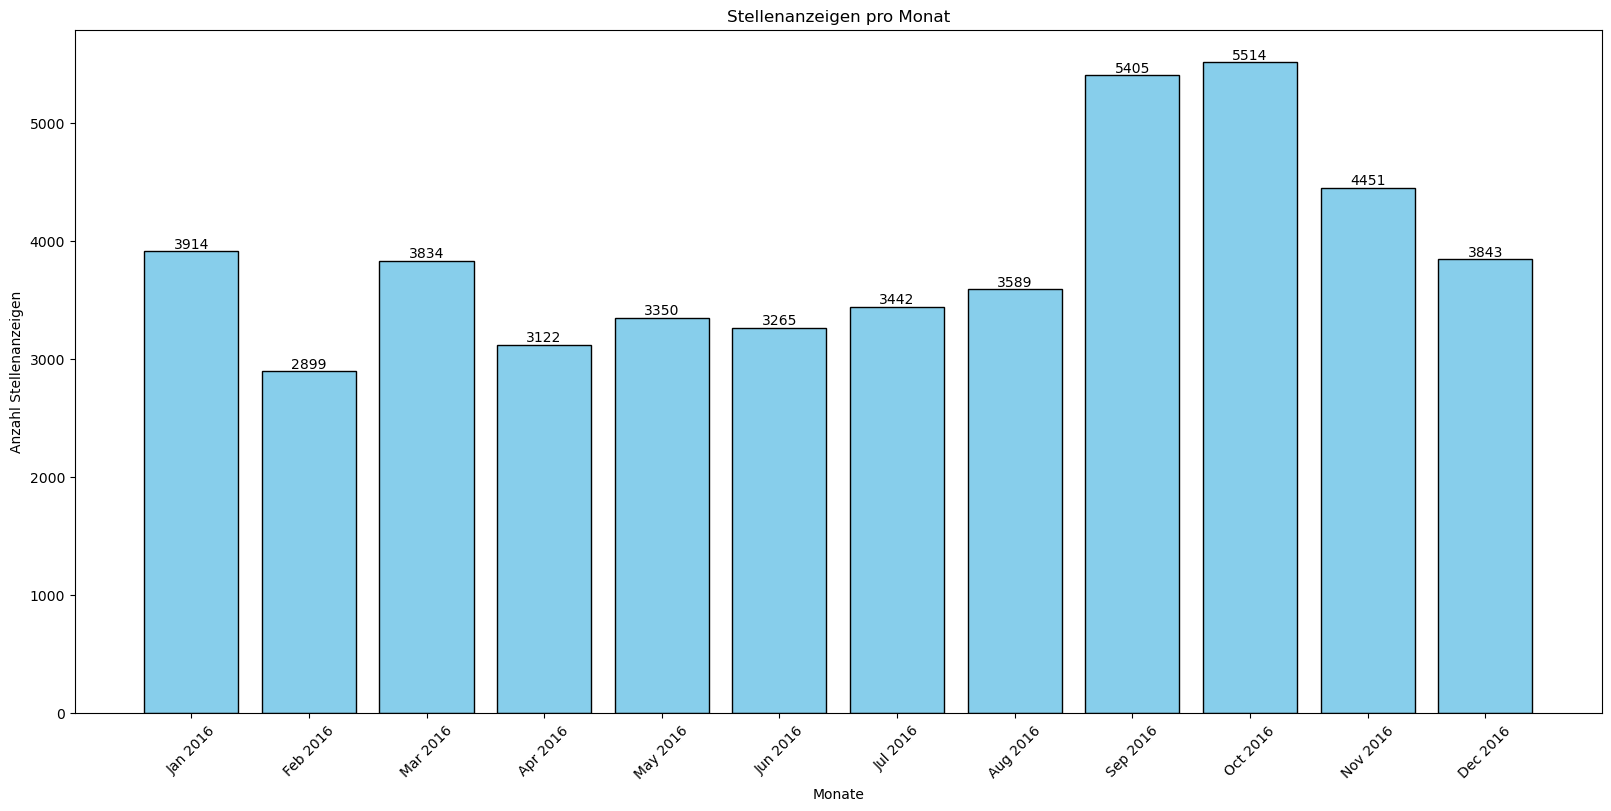

In [41]:
# Bar: Alle SteA pro Monat --> absolut
# Für alle Jahre
timestamps = [datetime.strptime(date, "%Y-%m-%d") for date in df_full.get("date")]
months = sorted({(ts.year, ts.month) for ts in timestamps})
month_labels = [datetime(year, month, 1).strftime("%b %Y") for year, month in months]
month_counts = {month: 0 for month in months}
years = sorted({ts.year for ts in timestamps})
year_counts = {year: 0 for year in years}
for ts in timestamps:
    month_counts[(ts.year, ts.month)] += 1
    year_counts[ts.year] += 1

xmonths = np.arange(len(month_labels))
ymonths = [month_counts[month] for month in months]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), constrained_layout=True, gridspec_kw={'height_ratios': [1]}) # viermal die eins am ende bei 4x4
ax = axes
barone = ax.bar(xmonths, ymonths, color='skyblue', edgecolor='black')
for rect in barone:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom')
ax.set_xticks(xmonths)
ax.set_xticklabels(month_labels, rotation=45)
ax.set_xlabel('Monate')
ax.set_ylabel('Anzahl Stellenanzeigen')
ax.set_title('Stellenanzeigen pro Monat')
plt.show()

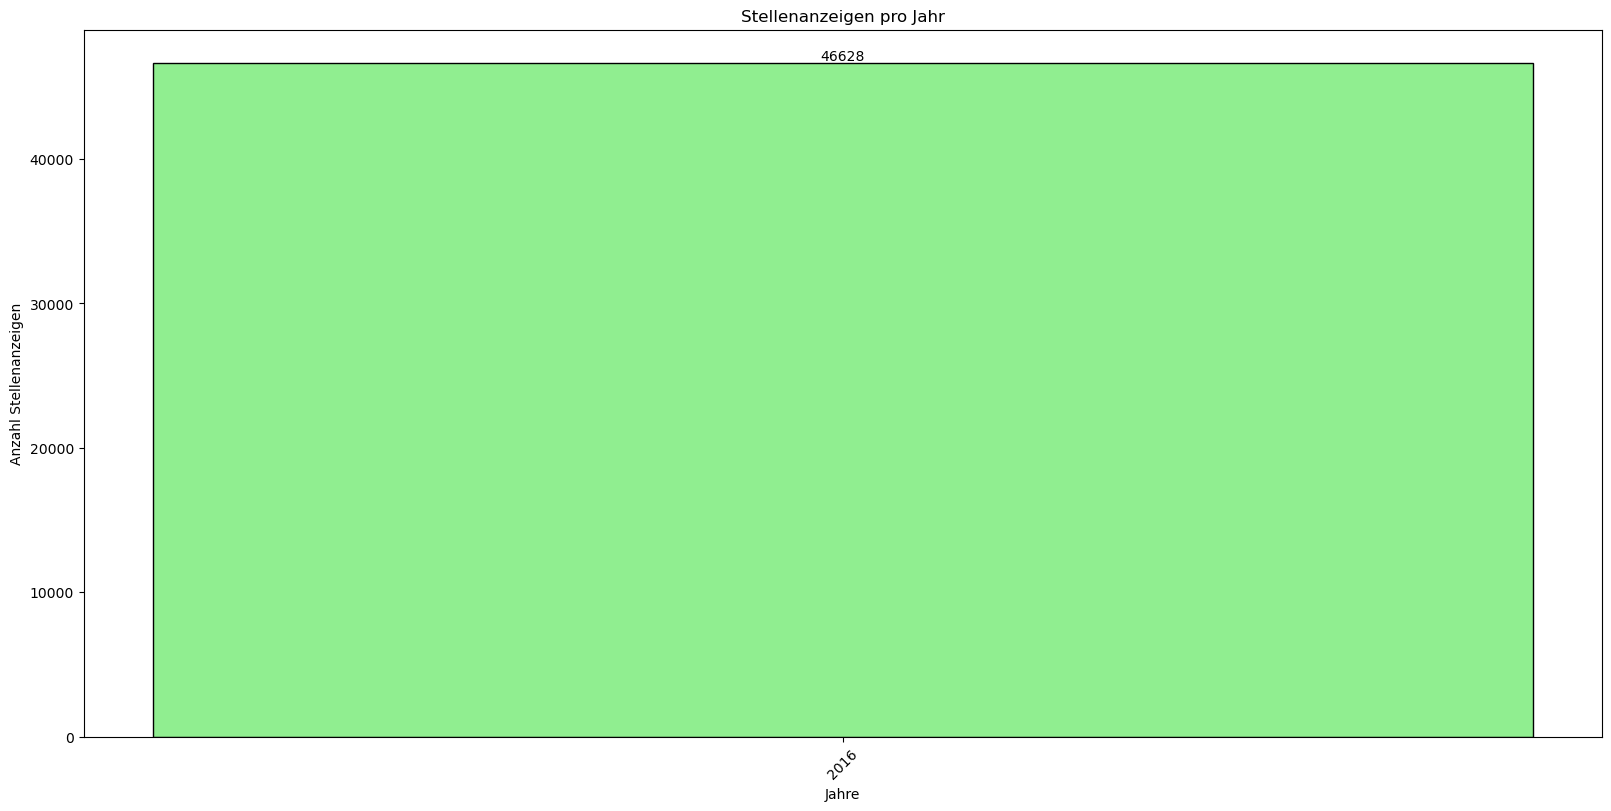

In [43]:
# Bar: Alle SteA pro Jahr absolut
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), constrained_layout=True, gridspec_kw={'height_ratios': [1]}) # viermal die eins am ende bei 4x4
xyears = np.arange(len(years))
yyears = [year_counts[year] for year in years]
ax = axes
bartwo = ax.bar(xyears, yyears, color='lightgreen', edgecolor='black')
for rect in bartwo:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom')
ax.set_xticks(xyears)
ax.set_xticklabels(years, rotation=45)
ax.set_xlabel('Jahre')
ax.set_ylabel('Anzahl Stellenanzeigen')
ax.set_title('Stellenanzeigen pro Jahr')
plt.show()

In [ ]:
# Genauere Betracht nur von den count_x_oza Werten --> diese sprechen die einzelne Gruppe x an, auch wenn andere
# Gruppen ebenfalls in der SteA genannt werden, so richtet sich diese doch auf jeden Fall an Gruppe X
#
# ToDo:
# Bar: SteA pro Jahr nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> absolut
# Bar: SteA pro Jahr nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> relativ
# Kurve: SteA pro Jahr nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> absolut
# Kurve: SteA pro Jahr nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> relativ
# Bar: SteA pro Monat nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> absolut
# Bar: SteA pro Monat nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> releativ
# Kurve: SteA pro Monat nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> absolut
# Kurve: SteA pro Monat nach Gruppe (alle SteA pro Gruppe --> mit Überschneidungen zu anderen Gruppen) --> relativ

# Wenn mehrere Jahre importiert werden:
# Mehrere Jahre können nicht importiert werden --> zu groß
# Ideen:
# * Notwendige Zahlen aus einem Jahr extrahieren, dann geladene Daten löschen (del) und das nächste Jahr laden
#
# Bar + Kurve: SteA in jedem Jahr insgesamt --> absolut + relativ
# Bar + Kurve: SteA in jedem Monat (über alle Jahre) insgesamt --> absolut + relativ
# Bar + Kurve: Stea in jedem Jahr nach Gruppe --> absolut + relativ
# Bar + Kurve: SteA in jedem Monat (über alle Jahre hinweg) nach Gruppe --> absolut + relativ
# Torte: Alle SteA in allen Jahren Anteile der Gruppen
# Torte + Venn: Überschneidungen pro Jahr --> oben for-schleife einbauen!

# Hochschulisch qualifizierte rausfiltern und darstellen